CS 210 Term Project

Name: Okan Arif

Surname: Güvenkaya

ID: 26780

Data: Health Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = "My_Health_Data.csv"
df = pd.read_csv(file_path)

# Function to remove outliers based on IQR
def remove_outliers(data_frame, columns):
    for column in columns:
        # Calculate the IQR for the column
        Q1 = data_frame[column].quantile(0.25)
        Q3 = data_frame[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows with values outside the bounds
        data_frame = data_frame[(data_frame[column] >= lower_bound) & (data_frame[column] <= upper_bound)]

    return data_frame

# Specify numerical columns for outlier removal
numerical_columns = ['Day', 'Move(kcal)', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']

# Remove outliers from numerical columns
df_cleaned = remove_outliers(df, numerical_columns)

# Display the cleaned dataset
print("Cleaned dataset without outliers:")
print(df_cleaned)

# Save the cleaned dataset, overwriting the existing file
df_cleaned.to_csv(file_path, index=False)


Cleaned dataset without outliers:
     Day     Month Day of Week  Move(kcal)  Exercise(min)  Stand(hours)  \
0     30  November    Thursday         301             22            10   
1     29  November   Wednesday         398             22            12   
2     28  November     Tuesday         690             17            13   
3     27  November      Monday         548             44            14   
5     25  November    Saturday         546             39            12   
..   ...       ...         ...         ...            ...           ...   
209    5       May      Friday         486             33            12   
210    4       May    Thursday         458             21            11   
211    3       May   Wednesday         460             34            11   
212    2       May     Tuesday         462             39            13   
213    1       May      Monday         193             18             6   

       Steps  Distance(km)  
0     8990.0          6.42  
1    12

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "My_Health_Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Day     Month Day of Week  Move(kcal)  Exercise(min)  Stand(hours)  \
0   30  November    Thursday         301             22            10   
1   29  November   Wednesday         398             22            12   
2   28  November     Tuesday         690             17            13   
3   27  November      Monday         548             44            14   
4   25  November    Saturday         546             39            12   

     Steps  Distance(km)  
0   8990.0          6.42  
1  12329.0          8.80  
2  23244.0         16.60  
3  17637.0         12.59  
4  15948.0         11.39  


In [ ]:
# Numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("\nNumeric columns:")
print(numeric_columns)

# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

# Shape information
print("\nShape of the dataset:")
print(df.shape)

# Summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())

# Info about the dataset, including data types and missing values
print("\nInfo about the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Numeric columns:
Index(['Day', 'Move(kcal)', 'Exercise(min)', 'Stand(hours)', 'Steps',
       'Distance(km)'],
      dtype='object')

Categorical columns:
Index(['Month', 'Day of Week'], dtype='object')

Shape of the dataset:
(211, 8)

Summary statistics:
              Day  Move(kcal)  Exercise(min)  Stand(hours)         Steps  \
count  211.000000  211.000000     211.000000    211.000000    211.000000   
mean    15.767773  394.412322      19.289100     11.094787  10921.524280   
std      8.844590  173.919893      12.536303      3.273344   5222.899278   
min      1.000000   27.000000       0.000000      3.000000      7.209000   
25%      8.000000  268.000000      10.000000      9.000000   6854.500000   
50%     16.000000  379.000000      17.000000     11.000000  11164.000000   
75%     23.000000  522.500000      28.000000     13.000000  14186.000000   
max     31.000000  890.000000      55.000000     19.000000  23311.000000   

       Distance(km)  
count    211.000000  
mean       8.0

In [ ]:
# Map categorical values to numeric values
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['Month'] = df['Month'].map(month_mapping)
df['Day of Week'] = df['Day of Week'].map(day_of_week_mapping)

# Display the updated dataframe
print("\nUpdated dataframe with mapped categorical values:")
print(df.head())


Updated dataframe with mapped categorical values:
   Day  Month  Day of Week  Move(kcal)  Exercise(min)  Stand(hours)    Steps  \
0   30     11            4         301             22            10   8990.0   
1   29     11            3         398             22            12  12329.0   
2   28     11            2         690             17            13  23244.0   
3   27     11            1         548             44            14  17637.0   
4   25     11            6         546             39            12  15948.0   

   Distance(km)  
0          6.42  
1          8.80  
2         16.60  
3         12.59  
4         11.39  


In [ ]:
# Sort the dataframe by 'Move(kcal)' column in descending order
sorted_df = df.sort_values(by='Move(kcal)', ascending=False)

# Select the top 10 days with the highest 'Move(kcal)' values
top_10_days = sorted_df.head(10)

# Print all data for these days
print("Top 10 days with the highest Move(kcal):")
print(top_10_days[['Day', 'Month', 'Day of Week', 'Move(kcal)', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']])

Top 10 days with the highest Move(kcal):
     Day  Month  Day of Week  Move(kcal)  Exercise(min)  Stand(hours)  \
181   31      5            3         890             51            15   
122   29      7            6         874             45            16   
159   22      6            4         813             37            14   
155   26      6            1         808             14            14   
157   24      6            6         807             28            10   
158   23      6            5         805             52            14   
111    9      8            3         797             25            16   
64    26      9            2         774             37            14   
121   30      7            7         773             10            14   
14    15     11            3         721             30            15   

       Steps  Distance(km)  
181  22544.0         16.08  
122  22672.0         16.19  
159  21317.0         15.22  
155  21143.0         15.10  
157  21227

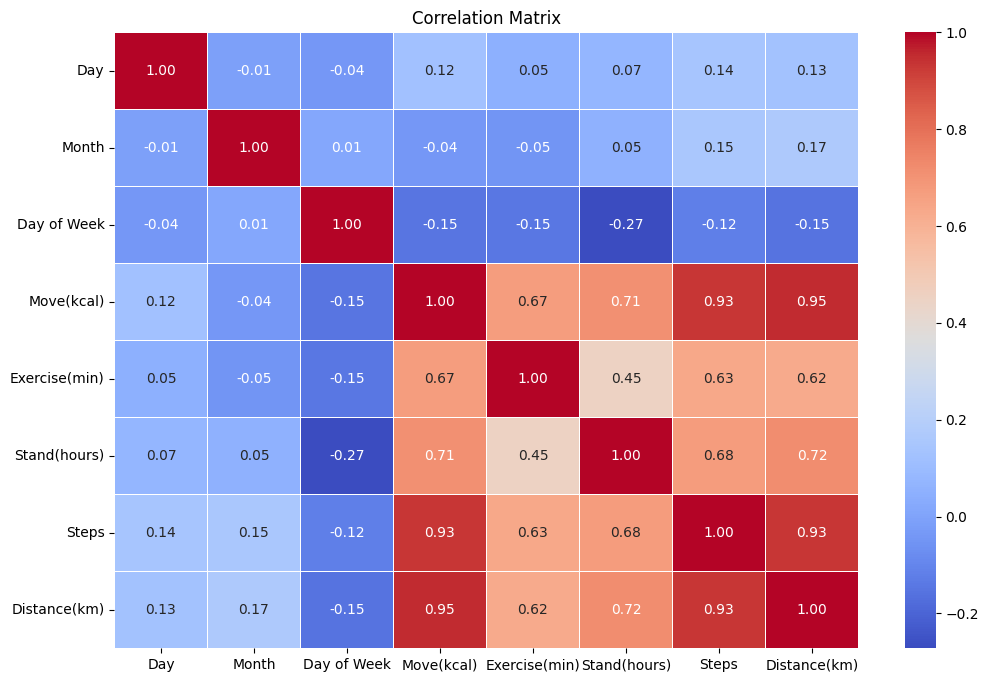

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

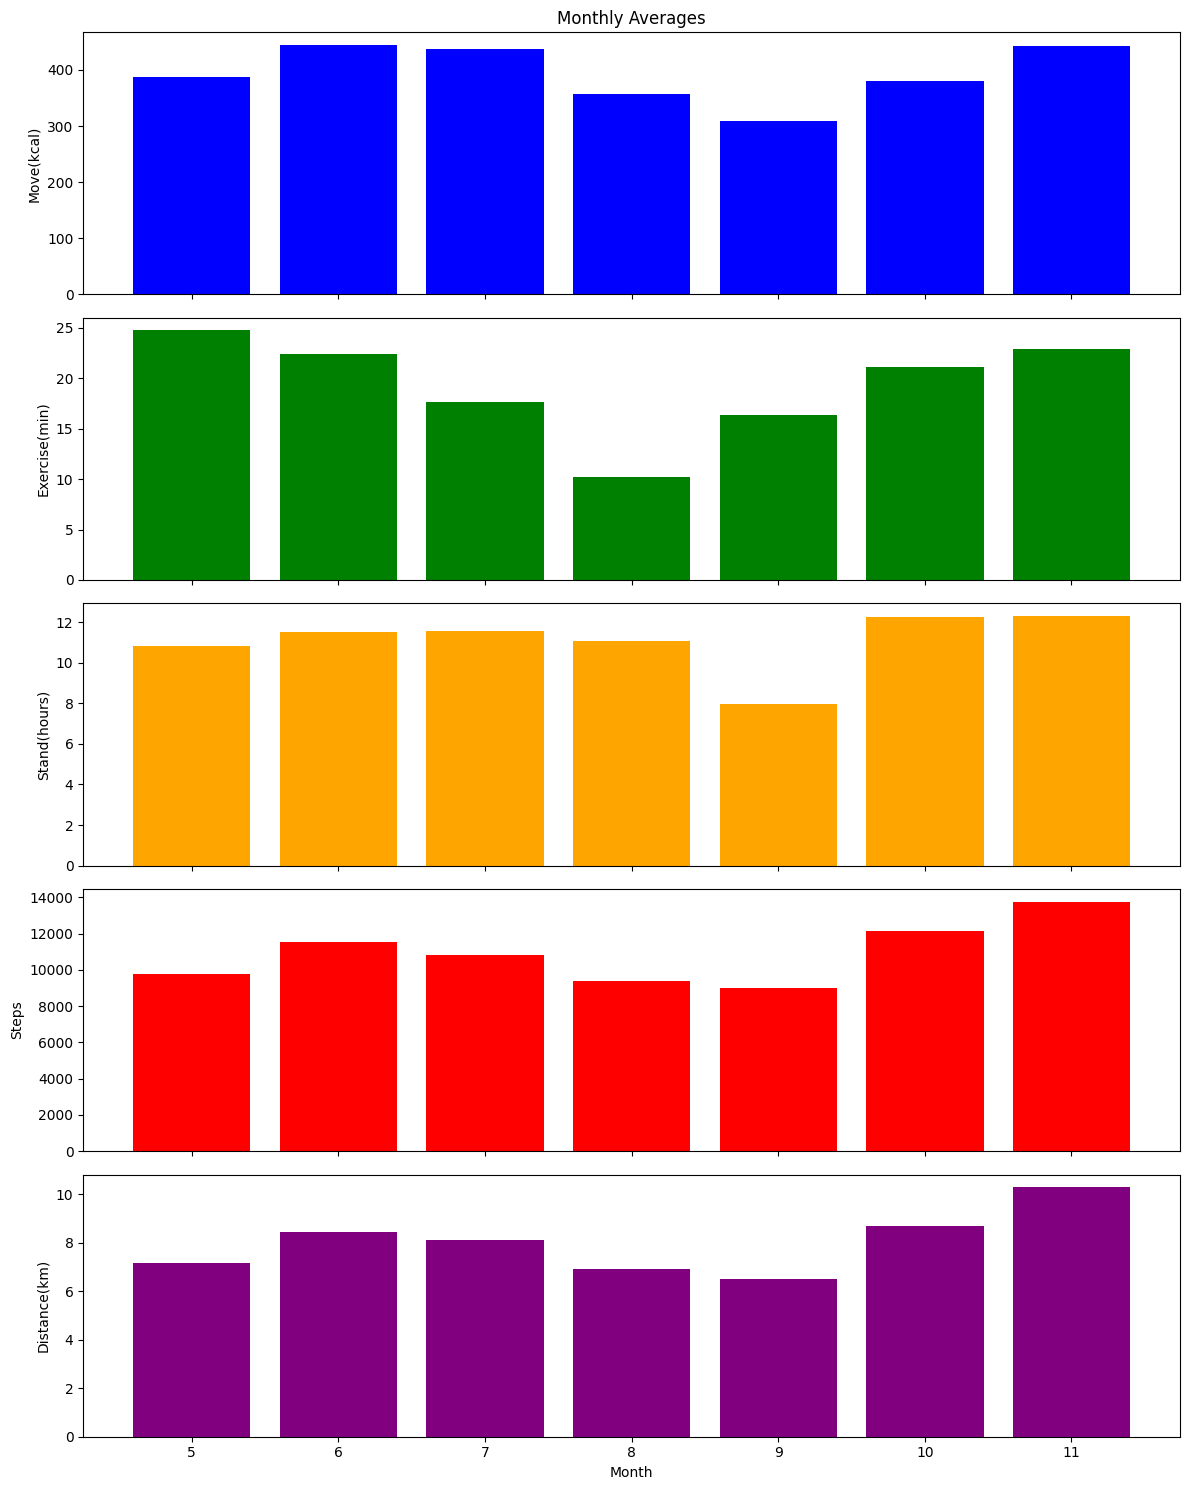

In [ ]:
# Group by 'Month' and calculate the mean for specified columns
monthly_avg = df.groupby('Month')[['Move(kcal)', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']].mean()

# Plot each column in a separate subplot
fig, axs = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

# Plot 'Move(kcal)'
axs[0].bar(monthly_avg.index, monthly_avg['Move(kcal)'], color='blue')
axs[0].set_ylabel('Move(kcal)')
axs[0].set_title('Monthly Averages')

# Plot 'Exercise(min)'
axs[1].bar(monthly_avg.index, monthly_avg['Exercise(min)'], color='green')
axs[1].set_ylabel('Exercise(min)')

# Plot 'Stand(hours)'
axs[2].bar(monthly_avg.index, monthly_avg['Stand(hours)'], color='orange')
axs[2].set_ylabel('Stand(hours)')

# Plot 'Steps'
axs[3].bar(monthly_avg.index, monthly_avg['Steps'], color='red')
axs[3].set_ylabel('Steps')

# Plot 'Distance(km)'
axs[4].bar(monthly_avg.index, monthly_avg['Distance(km)'], color='purple')
axs[4].set_xlabel('Month')
axs[4].set_ylabel('Distance(km)')

plt.tight_layout()
plt.show()

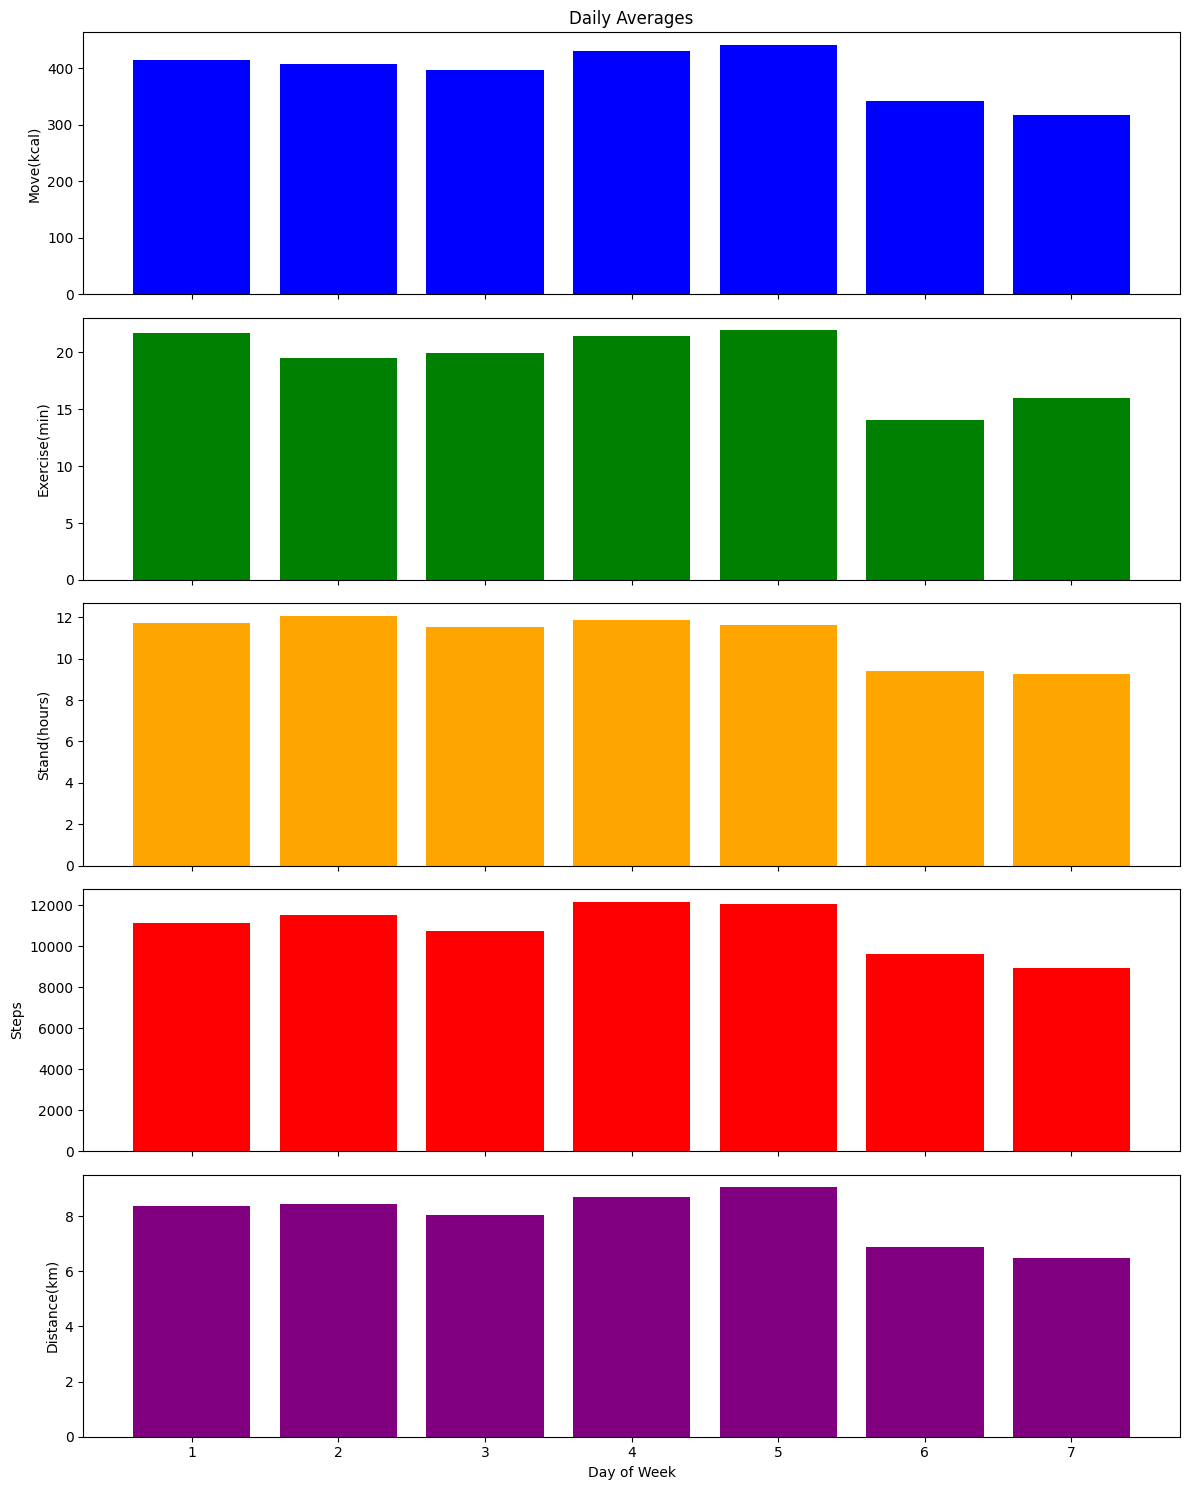

In [ ]:
df['Day of Week'] = df['Day of Week'].astype('category')

# Group by 'Day of Week' and calculate the mean for specified columns
daily_avg = df.groupby('Day of Week')[['Move(kcal)', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']].mean()

# Plot each column in a separate subplot
fig, axs = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

# Plot 'Move(kcal)'
axs[0].bar(daily_avg.index, daily_avg['Move(kcal)'], color='blue')
axs[0].set_ylabel('Move(kcal)')
axs[0].set_title('Daily Averages')

# Plot 'Exercise(min)'
axs[1].bar(daily_avg.index, daily_avg['Exercise(min)'], color='green')
axs[1].set_ylabel('Exercise(min)')

# Plot 'Stand(hours)'
axs[2].bar(daily_avg.index, daily_avg['Stand(hours)'], color='orange')
axs[2].set_ylabel('Stand(hours)')

# Plot 'Steps'
axs[3].bar(daily_avg.index, daily_avg['Steps'], color='red')
axs[3].set_ylabel('Steps')

# Plot 'Distance(km)'
axs[4].bar(daily_avg.index, daily_avg['Distance(km)'], color='purple')
axs[4].set_xlabel('Day of Week')
axs[4].set_ylabel('Distance(km)')

plt.tight_layout()
plt.show()

Mean Squared Error: 651.7992043990869
R-squared: 0.9759613793126259


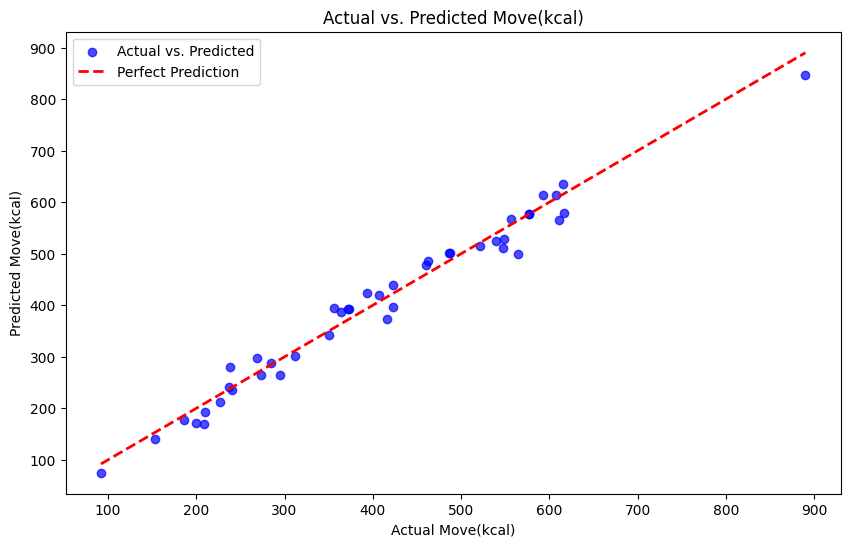

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "My_Health_Data.csv"
df = pd.read_csv(file_path)

# Map categorical values to numeric values
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['Month'] = df['Month'].map(month_mapping)
df['Day of Week'] = df['Day of Week'].map(day_of_week_mapping)

# Convert 'Day of Week' column to categorical type
df['Day of Week'] = df['Day of Week'].astype('category')

# Selecting features and target variable
features = ['Day', 'Month', 'Day of Week', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']
target = 'Move(kcal)'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions, alpha=0.7, color='b', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')

plt.title("Actual vs. Predicted Move(kcal)")
plt.xlabel("Actual Move(kcal)")
plt.ylabel("Predicted Move(kcal)")
plt.legend()
plt.show()


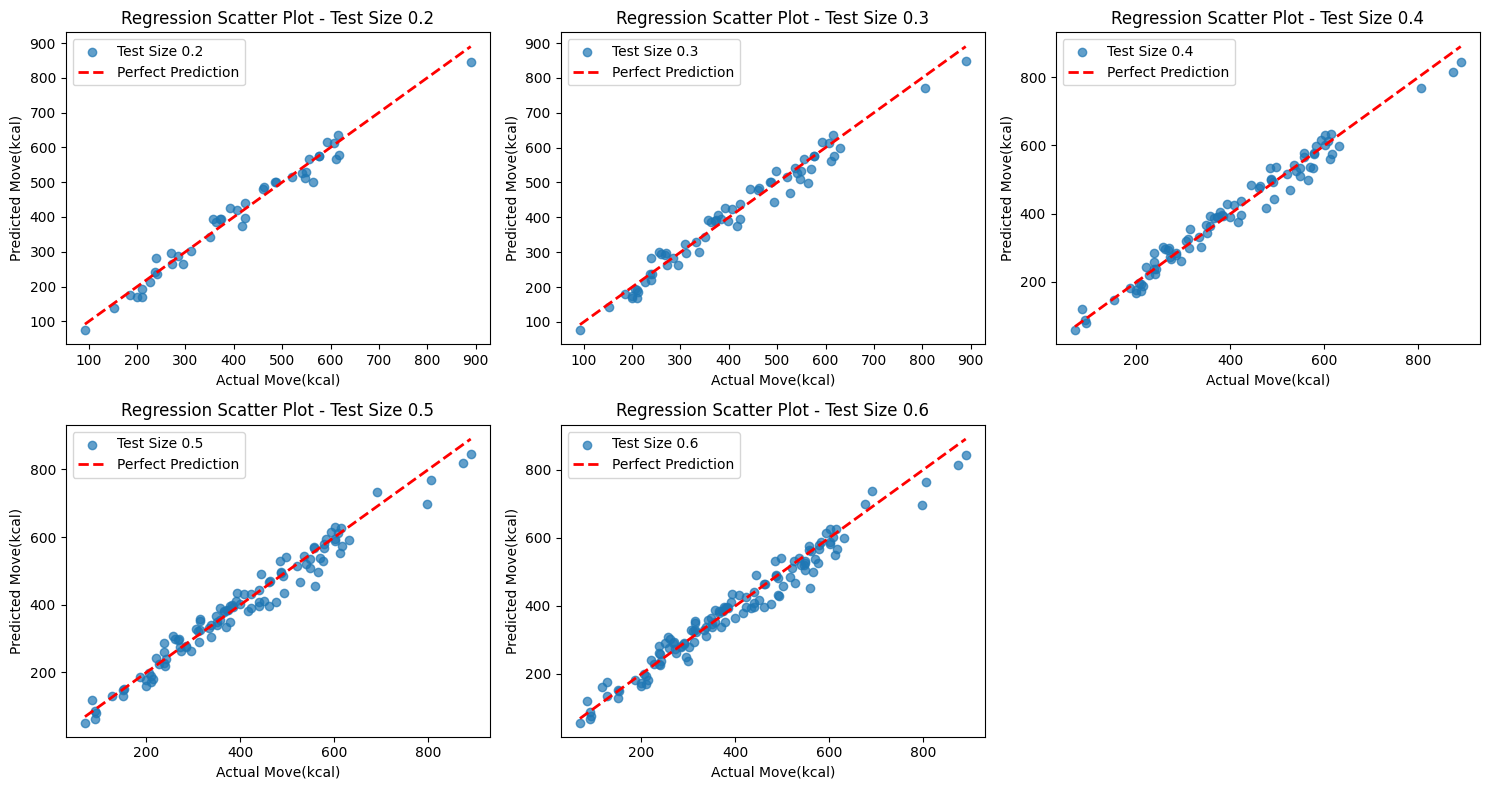


Results for Different Test Sizes:
   Test Size  Mean Squared Error  R-squared
0        0.2          651.799204   0.975961
1        0.3          765.472317   0.970890
2        0.4          785.472984   0.973447
3        0.5         1030.125418   0.965365
4        0.6         1059.993174   0.962843


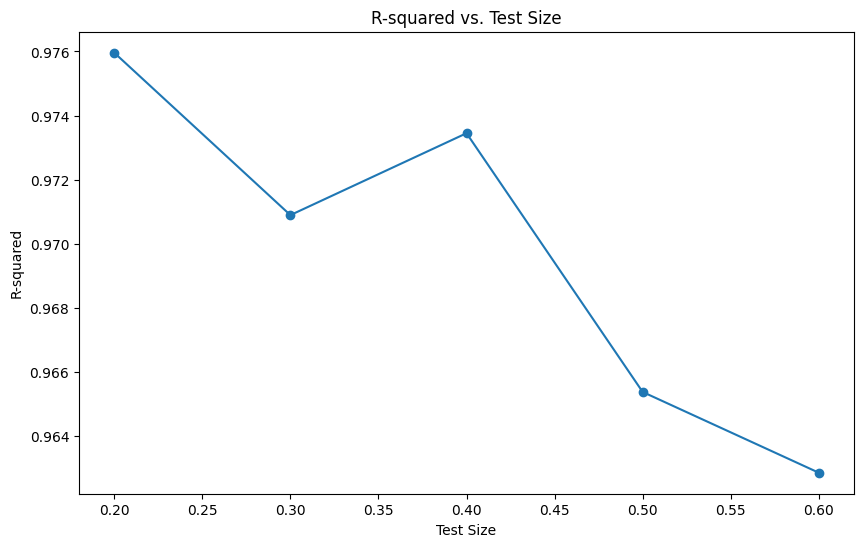

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "My_Health_Data.csv"
df = pd.read_csv(file_path)

# Map categorical values to numeric values
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['Month'] = df['Month'].map(month_mapping)
df['Day of Week'] = df['Day of Week'].map(day_of_week_mapping)

# Convert 'Day of Week' column to categorical type
df['Day of Week'] = df['Day of Week'].astype('category')

# Selecting features and target variable
features = ['Day', 'Month', 'Day of Week', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']
target = 'Move(kcal)'

# Creating a table to store results
results_table = pd.DataFrame(columns=['Test Size', 'Mean Squared Error', 'R-squared'])

# Iterating over different test sizes
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

# Plotting regression scatter plots for each trial
plt.figure(figsize=(15, 8))
for idx, test_size in enumerate(test_sizes, 1):
    # Split the data into features (X) and target variable (y)
    X = df[features]
    y = df[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create a Linear Regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store the results in the table
    results_table = pd.concat([results_table, pd.DataFrame({'Test Size': [test_size], 'Mean Squared Error': [mse], 'R-squared': [r2]})], ignore_index=True)

    # Plot the regression scatter plot
    plt.subplot(2, 3, idx)
    plt.scatter(y_test, predictions, alpha=0.7, label=f'Test Size {test_size}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='r', linewidth=2, label='Perfect Prediction')
    plt.title(f"Regression Scatter Plot - Test Size {test_size}")
    plt.xlabel("Actual Move(kcal)")
    plt.ylabel("Predicted Move(kcal)")
    plt.legend()

plt.tight_layout()
plt.show()

# Print the results table
print("\nResults for Different Test Sizes:")
print(results_table)

# Plotting R-squared values against test sizes
plt.figure(figsize=(10, 6))
plt.plot(results_table['Test Size'], results_table['R-squared'], marker='o')
plt.title("R-squared vs. Test Size")
plt.xlabel("Test Size")
plt.ylabel("R-squared")
plt.show()


In [ ]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "My_Health_Data.csv"
df = pd.read_csv(file_path)

# Map categorical values to numeric values
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['Month'] = df['Month'].map(month_mapping)
df['Day of Week'] = df['Day of Week'].map(day_of_week_mapping)

# Convert 'Day of Week' column to categorical type
df['Day of Week'] = df['Day of Week'].astype('category')

# Selecting features and target variable
features = ['Day', 'Month', 'Day of Week', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']
target = 'Move(kcal)'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different values for n_estimators
n_estimators_list = [10, 50, 100, 200, 300]

# Lists to store results
results = []

for n_estimators in n_estimators_list:
    start_time = time.time()

    # Create a Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    end_time = time.time()
    calculation_time = end_time - start_time

    # Store the results in the list
    results.append({'n_estimators': n_estimators, 'Mean Squared Error': mse, 'R-squared': r2, 'Calculation Time (s)': calculation_time})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the combined results table
print(results_df)


   n_estimators  Mean Squared Error  R-squared  Calculation Time (s)
0            10          975.814419   0.964012              0.015707
1            50          778.887693   0.971274              0.067876
2           100          736.515679   0.972837              0.115425
3           200          720.114670   0.973442              0.222900
4           300          686.918162   0.974666              0.338552


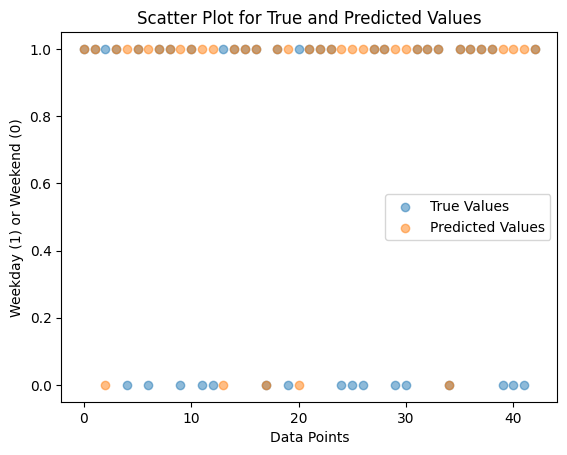

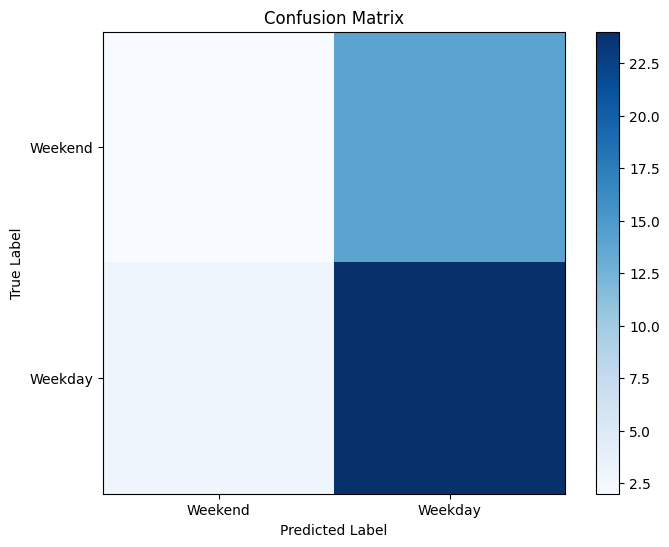

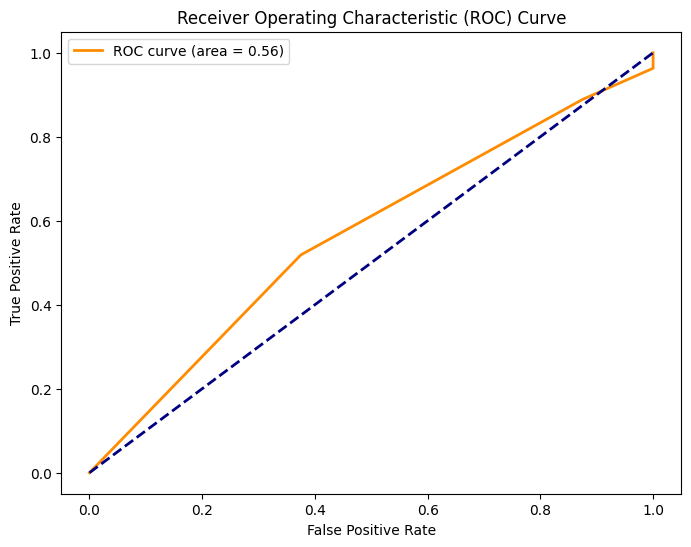

Accuracy: 0.6046511627906976

Confusion Matrix:
[[ 2 14]
 [ 3 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.63      0.89      0.74        27

    accuracy                           0.60        43
   macro avg       0.52      0.51      0.46        43
weighted avg       0.55      0.60      0.53        43



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = "My_Health_Data.csv"
df = pd.read_csv(file_path)

# Map categorical values to numeric values
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

df['Month'] = df['Month'].map(month_mapping)
df['Day of Week'] = df['Day of Week'].map(day_of_week_mapping)

# Convert 'Day of Week' column to integer
df['Day of Week'] = df['Day of Week'].astype(int)

# Create a new column to represent weekdays (1) or weekends (0)
df['Weekday'] = (df['Day of Week'] <= 5).astype(int)

# Selecting features and target variable
features = ['Day', 'Month', 'Exercise(min)', 'Stand(hours)', 'Steps', 'Distance(km)']
target = 'Weekday'

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Plot scatter plot for predicted values
plt.scatter(range(len(predictions)), y_test, label='True Values', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, label='Predicted Values', alpha=0.5)
plt.title('Scatter Plot for True and Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Weekday (1) or Weekend (0)')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.yticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print classification report and accuracy
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
